## Scikit-spatial

In [3]:
from skspatial.objects import Point, Vector, Line
from skspatial.plotting import plot_2d
import matplotlib.pyplot as plt

# Crear puntos
punto_a = Point([1, 1])
punto_b = Point([4, 3])

# Crear un vector desde A hacia B
vector_ab = Vector.from_points(punto_a, punto_b)

# Crear una línea a partir de un punto y un vector
linea = Line(point=punto_a, direction=vector_ab)

# Mostrar todo en un mismo gráfico
plot_2d(
    [punto_a, punto_b, vector_ab, linea],
    xlim=(0, 6),
    ylim=(0, 6),
    show=False,  # cambia esto
)

plt.show()  # añade esta línea


: 

## Sktime

MAPE: 12.06%


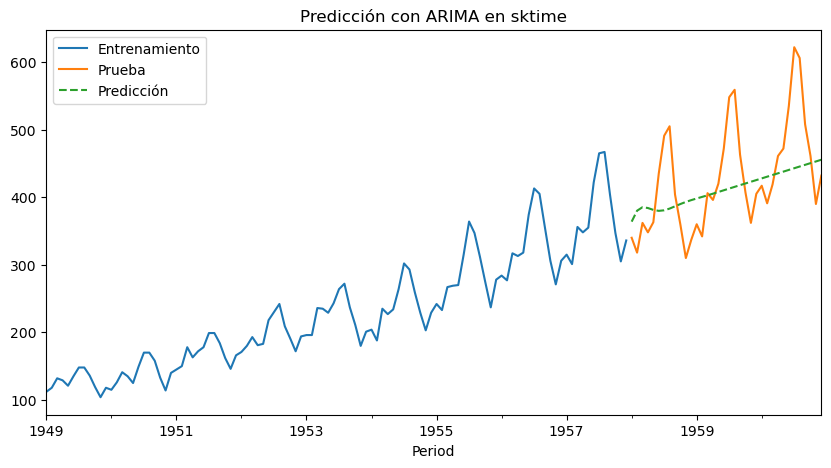

In [1]:
from sktime.datasets import load_airline
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.arima import ARIMA
from sktime.forecasting.base import ForecastingHorizon
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
import matplotlib.pyplot as plt

# 1. Cargar un dataset de series temporales
y = load_airline()

# 2. Dividir en entrenamiento y prueba
y_train, y_test = temporal_train_test_split(y, test_size=36)

# 3. Crear horizonte de predicción
fh = ForecastingHorizon(y_test.index, is_relative=False)

# 4. Crear y entrenar modelo ARIMA
model = ARIMA(order=(2, 1, 1))
model.fit(y_train)

# 5. Realizar predicciones
y_pred = model.predict(fh)

# 6. Evaluar el modelo
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape:.2%}")

# 7. Visualizar resultados
y_train.plot(label="Entrenamiento", figsize=(10, 5))
y_test.plot(label="Prueba")
y_pred.plot(label="Predicción", linestyle="--")
plt.legend()
plt.title("Predicción con ARIMA en sktime")
plt.show()


## Scikit-image 

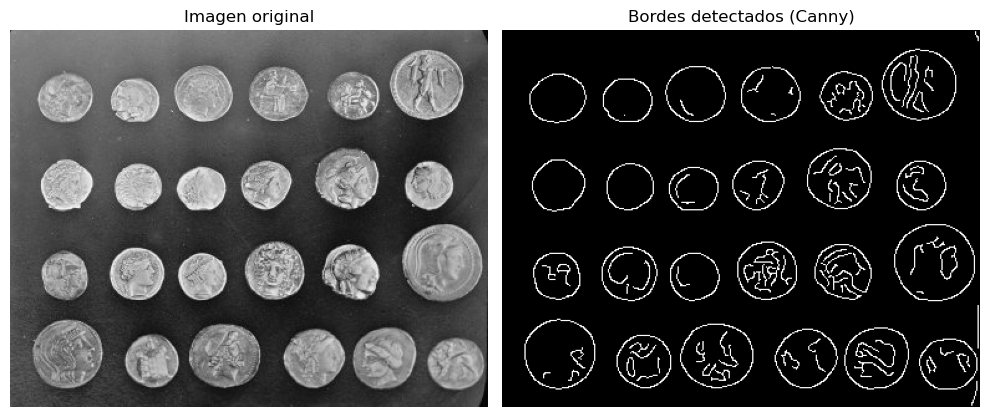

In [2]:
from skimage import data, color, feature
import matplotlib.pyplot as plt

# 1. Cargar una imagen de ejemplo integrada
imagen = data.coins()

# 2. Convertir a escala de grises (si no lo está)
imagen_gris = color.rgb2gray(imagen) if imagen.ndim == 3 else imagen

# 3. Aplicar el detector de bordes de Canny
bordes = feature.canny(imagen_gris, sigma=2.0)

# 4. Mostrar resultados
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(imagen, cmap='gray')
ax[0].set_title('Imagen original')
ax[0].axis('off')

ax[1].imshow(bordes, cmap='gray')
ax[1].set_title('Bordes detectados (Canny)')
ax[1].axis('off')

plt.tight_layout()
plt.show()
